

# Bahria University, Lahore Campus  
**Department of Computer Science**  
**Assignment 02**  
*(Spring 2025)*  

---

### **Course Information**  
- **Course:** Machine Learning  
- **Date:** 9-5-25
- **Course Code:** AIL-301  
- **Max Marks:** 5
- **Faculty’s Name:** Mr Mudassir

---

### **Student Information**  
- **Name:** Usman Ali
- **Enroll No:** 03-134221-044
- **Class:** BSCS 7A





In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, KBinsDiscretizer, Binarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2, RFE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_auc_score, silhouette_score, davies_bouldin_score
)

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from collections import Counter
from xgboost import XGBClassifier
import joblib


In [4]:
df=pd.read_csv('../Datasets/titanic.csv')

In [5]:
print(df.head)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)

/tmp/ipykernel_13182/1350131670.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)


In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [11]:
df.dropna(subset=['Embarked'], inplace=True)

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [14]:
df.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [16]:
df['Sex']=df['Sex'].map({'male':0, 'female':1})
df['Embarked']=df['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [17]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [18]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [19]:
numerical_features=['Age', 'SibSp', 'Parch', 'Fare']
categorical_features=['Pclass', 'Sex', 'Embarked']

In [20]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']

In [21]:
scaler=StandardScaler()

X_scaled=scaler.fit_transform(X)

In [22]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[889 rows x 7 columns]


In [23]:
joblib.dump(scaler, 'scaler_model.pkl')

print("Scaler saved successfully!")

Scaler saved successfully!


In [24]:
print(X_scaled)

[[ 0.82520863 -0.73534203 -0.59049493 ... -0.47432585 -0.50023975
  -0.56968402]
 [-1.57221121  1.35991138  0.64397101 ... -0.47432585  0.78894661
   1.00313924]
 [ 0.82520863  1.35991138 -0.28187844 ... -0.47432585 -0.48664993
  -0.56968402]
 ...
 [ 0.82520863  1.35991138  0.00352373 ...  2.00611934 -0.17408416
  -0.56968402]
 [-1.57221121 -0.73534203 -0.28187844 ... -0.47432585 -0.0422126
   1.00313924]
 [ 0.82520863 -0.73534203  0.18104628 ... -0.47432585 -0.49017322
   2.5759625 ]]


In [25]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
import numpy as np

results = {}

y_true = y

# KMeans
best_k = 0
best_silhouette = -1
best_ari = -1
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    sil_score = silhouette_score(X, labels)
    ari_score = adjusted_rand_score(y_true, labels)
    if sil_score > best_silhouette:
        best_silhouette = sil_score
        best_k = k
        best_ari = ari_score

results['KMeans'] = {'Silhouette': best_silhouette, 'ARI': best_ari}
print(f"KMeans (K={best_k}) → Silhouette: {best_silhouette:.4f}, ARI: {best_ari:.4f}")

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
if len(set(dbscan_labels)) > 1:
    sil_score = silhouette_score(X, dbscan_labels)
    ari_score = adjusted_rand_score(y_true, dbscan_labels)
    results['DBSCAN'] = {'Silhouette': sil_score, 'ARI': ari_score}
    print(f"DBSCAN → Silhouette: {sil_score:.4f}, ARI: {ari_score:.4f}")
else:
    print("DBSCAN formed one cluster, Silhouette undefined.")

# Agglomerative Clustering
best_k_agg = 0
best_silhouette_agg = -1
best_ari_agg = -1
for k in range(2, 10):
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(X)
    sil_score = silhouette_score(X, labels)
    ari_score = adjusted_rand_score(y_true, labels)
    if sil_score > best_silhouette_agg:
        best_silhouette_agg = sil_score
        best_k_agg = k
        best_ari_agg = ari_score

results['Agglomerative'] = {'Silhouette': best_silhouette_agg, 'ARI': best_ari_agg}
print(f"Agglomerative (K={best_k_agg}) → Silhouette: {best_silhouette_agg:.4f}, ARI: {best_ari_agg:.4f}")

# Gaussian Mixture Model (GMM)
best_k_gmm = 0
best_silhouette_gmm = -1
best_ari_gmm = -1
for k in range(2, 10):
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X)
    sil_score = silhouette_score(X, labels)
    ari_score = adjusted_rand_score(y_true, labels)
    if sil_score > best_silhouette_gmm:
        best_silhouette_gmm = sil_score
        best_k_gmm = k
        best_ari_gmm = ari_score

results['GMM'] = {'Silhouette': best_silhouette_gmm, 'ARI': best_ari_gmm}
print(f"GMM (K={best_k_gmm}) → Silhouette: {best_silhouette_gmm:.4f}, ARI: {best_ari_gmm:.4f}")

# Print final results
print("\n📊 Final Results (Silhouette & ARI):")
for model, scores in results.items():
    print(f"{model}: Silhouette = {scores['Silhouette']:.4f}, ARI = {scores['ARI']:.4f}")


KMeans (K=2) → Silhouette: 0.8079, ARI: 0.0372
DBSCAN → Silhouette: -0.2882, ARI: -0.0390
Agglomerative (K=2) → Silhouette: 0.8472, ARI: 0.0143
GMM (K=2) → Silhouette: 0.5239, ARI: 0.1133

📊 Final Results (Silhouette & ARI):
KMeans: Silhouette = 0.8079, ARI = 0.0372
DBSCAN: Silhouette = -0.2882, ARI = -0.0390
Agglomerative: Silhouette = 0.8472, ARI = 0.0143
GMM: Silhouette = 0.5239, ARI = 0.1133


In [ ]:

results_silhouette = {}
results_ari = {}

best_k = 0
best_score = -1
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    if score > best_score:
        best_score = score
        best_k = k
best_kmeans = KMeans(n_clusters=best_k, random_state=42).fit_predict(X_scaled)
results_silhouette['KMeans'] = silhouette_score(X_scaled, best_kmeans)
results_ari['KMeans'] = adjusted_rand_score(y_true, best_kmeans)
print(f"KMeans (K={best_k}) Silhouette: {results_silhouette['KMeans']:.4f}, ARI: {results_ari['KMeans']:.4f}")

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
if len(set(dbscan_labels)) > 1:
    results_silhouette['DBSCAN'] = silhouette_score(X_scaled, dbscan_labels)
    results_ari['DBSCAN'] = adjusted_rand_score(y_true, dbscan_labels)
    print(f"DBSCAN Silhouette: {results_silhouette['DBSCAN']:.4f}, ARI: {results_ari['DBSCAN']:.4f}")
else:
    print("DBSCAN formed one cluster, Silhouette & ARI undefined.")

best_k_agg = 0
best_score_agg = -1
for k in range(2, 10):
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    if score > best_score_agg:
        best_score_agg = score
        best_k_agg = k
best_agg = AgglomerativeClustering(n_clusters=best_k_agg).fit_predict(X_scaled)
results_silhouette['Agglomerative'] = silhouette_score(X_scaled, best_agg)
results_ari['Agglomerative'] = adjusted_rand_score(y_true, best_agg)
print(f"Agglomerative (K={best_k_agg}) Silhouette: {results_silhouette['Agglomerative']:.4f}, ARI: {results_ari['Agglomerative']:.4f}")


best_k_gmm = 0
best_score_gmm = -1
for k in range(2, 10):
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    if score > best_score_gmm:
        best_score_gmm = score
        best_k_gmm = k
best_gmm = GaussianMixture(n_components=best_k_gmm, random_state=42).fit_predict(X_scaled)
results_silhouette['GMM'] = silhouette_score(X_scaled, best_gmm)
results_ari['GMM'] = adjusted_rand_score(y_true, best_gmm)
print(f"GMM (K={best_k_gmm}) Silhouette: {results_silhouette['GMM']:.4f}, ARI: {results_ari['GMM']:.4f}")

print("\nAll Silhouette Scores:")
for model, score in results_silhouette.items():
    print(f"{model}: {score:.4f}")

print("\nAll Adjusted Rand Index (ARI) Scores:")
for model, score in results_ari.items():
    print(f"{model}: {score:.4f}")


KMeans (K=8) Silhouette: 0.3301, ARI: 0.1544
DBSCAN Silhouette: 0.1045, ARI: 0.0477
Agglomerative (K=9) Silhouette: 0.3149, ARI: 0.1618
GMM (K=8) Silhouette: 0.2932, ARI: 0.1707

All Silhouette Scores:
KMeans: 0.3301
DBSCAN: 0.1045
Agglomerative: 0.3149
GMM: 0.2932

All Adjusted Rand Index (ARI) Scores:
KMeans: 0.1544
DBSCAN: 0.0477
Agglomerative: 0.1618
GMM: 0.1707


In [27]:

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [28]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_



In [ ]:
print("KMeans Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
print("KMeans Adjusted Rand Index:", adjusted_rand_score(y, kmeans_labels))


KMeans Silhouette Score: 0.2532590158058793
KMeans Adjusted Rand Index: 0.11044324750650066


In [33]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(X_scaled)

print("Agglomerative Silhouette Score:", silhouette_score(X_scaled, agglo_labels))
print("KMeans Adjusted Rand Index:", adjusted_rand_score(y, kmeans_labels))


Agglomerative Silhouette Score: 0.2478105815436045
KMeans Adjusted Rand Index: 0.11044324750650066


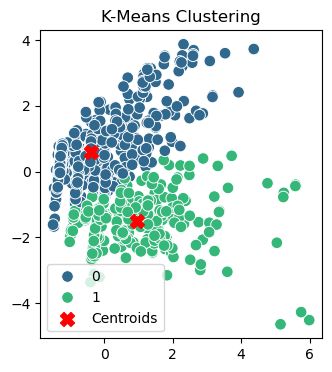

In [34]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis', s=70)
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.legend()

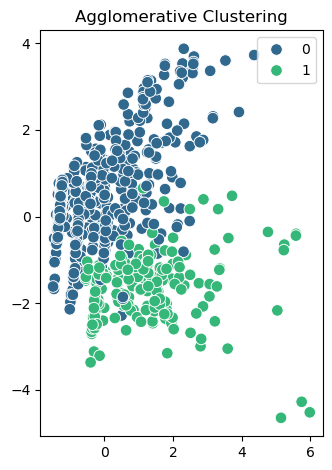

In [35]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=agglo_labels, palette='viridis', s=70)
plt.title("Agglomerative Clustering")

plt.tight_layout()
plt.show()

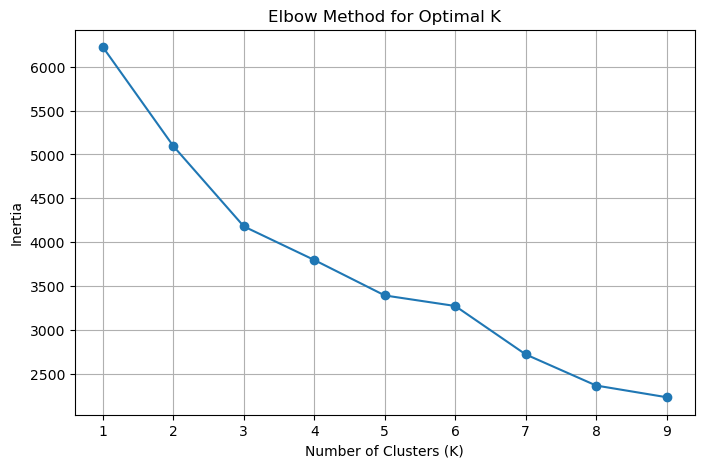

In [36]:
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.xticks(K_range)
plt.grid()
plt.show()

[0.8078843294029338, 0.6620191209409576, 0.6475797801167626, 0.3415891746393023, 0.34900664488784106, 0.47542781187787525, 0.4623247018923195, 0.4596328855123099]


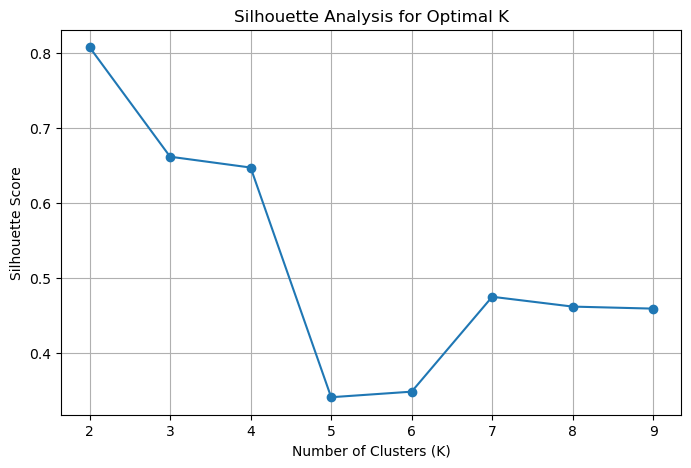

In [37]:


silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

print (silhouette_scores)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal K")
plt.grid()
plt.show()

In [38]:

binarizer = Binarizer()
X_bin = pd.DataFrame(binarizer.fit_transform(X), columns=X.columns)


print(X_bin[:5])


   Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0     1.0  0.0  1.0    1.0    0.0   1.0       0.0
1     1.0  1.0  1.0    1.0    0.0   1.0       1.0
2     1.0  1.0  1.0    0.0    0.0   1.0       0.0
3     1.0  1.0  1.0    1.0    0.0   1.0       0.0
4     1.0  0.0  1.0    0.0    0.0   1.0       0.0


In [39]:
selector = SelectKBest(score_func=chi2, k=3)
selector.fit(X, labels)

chi_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': selector.scores_
})

chi_scores = chi_scores.sort_values(by='Chi2 Score', ascending=False)

print(chi_scores)


    Feature    Chi2 Score
5      Fare  66488.454525
2       Age   3016.789463
3     SibSp    444.567297
4     Parch    341.534173
0    Pclass    130.854256
1       Sex     35.588557
6  Embarked     32.599991


In [40]:
top_features = chi_scores['Feature'].head(3).tolist()

print("\nTop selected features:", top_features)

X_selected = X_bin[top_features]

print("\nShape of selected features:", X_selected.shape)


Top selected features: ['Fare', 'Age', 'SibSp']

Shape of selected features: (889, 3)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [42]:
print(type(X_bin))


<class 'pandas.core.frame.DataFrame'>


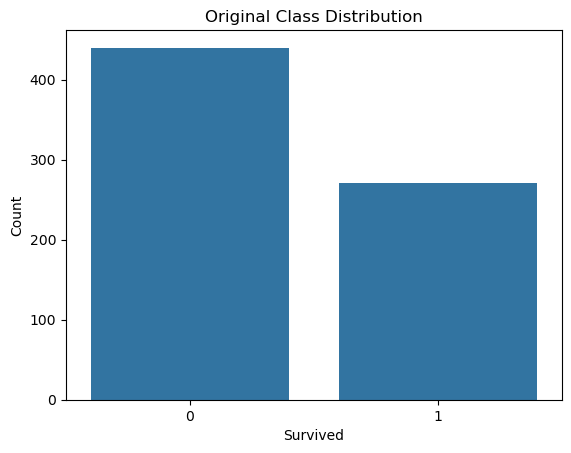

In [43]:
def plot_distribution(y, title):
    sns.countplot(x=y)
    plt.title(title)
    plt.xlabel('Survived')
    plt.ylabel('Count')
    plt.show()


plot_distribution(y_train, 'Original Class Distribution')

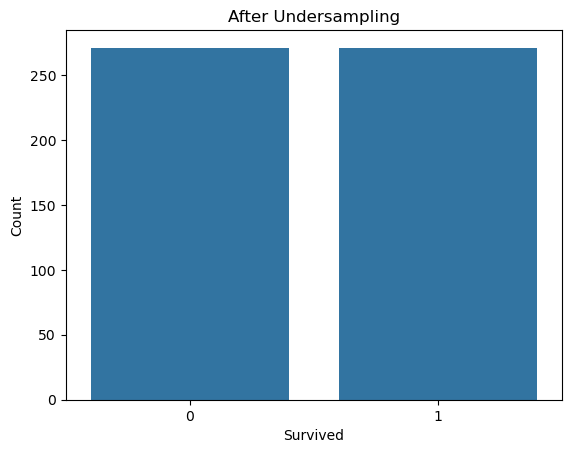

In [44]:

under_sampler = RandomUnderSampler(random_state=42)
X_under, y_under = under_sampler.fit_resample(X_train, y_train)
plot_distribution(y_under, 'After Undersampling')

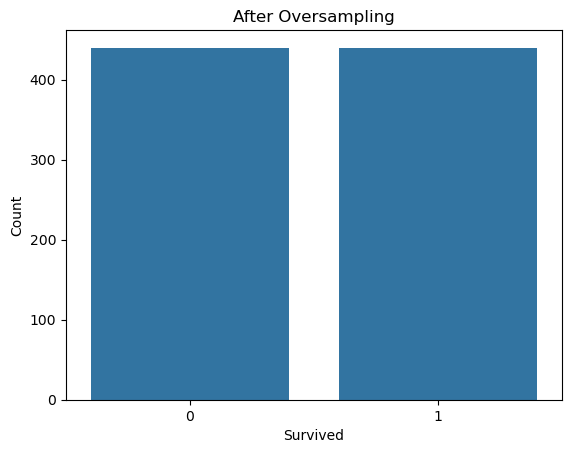

In [45]:
over_sampler = RandomOverSampler(random_state=42)
X_over, y_over = over_sampler.fit_resample(X_train, y_train)
plot_distribution(y_over, "After Oversampling")

In [46]:
 X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

In [47]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

In [48]:
joblib.dump(log_reg, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

In [49]:
print("🔹 Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr))

🔹 Logistic Regression Results:
Accuracy: 0.7982
Precision: 0.7955
Recall: 0.7292
F1-Score: 0.7609

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.85      0.83        61
           1       0.80      0.73      0.76        48

    accuracy                           0.80       109
   macro avg       0.80      0.79      0.79       109
weighted avg       0.80      0.80      0.80       109



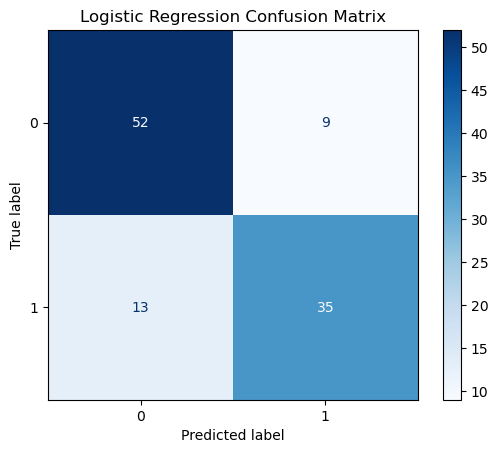

In [50]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

##K Nearest Neighbours

In [51]:

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [52]:
print("🔹 K-Nearest Neighbors Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_knn))

🔹 K-Nearest Neighbors Results:
Accuracy: 0.8073
Precision: 0.7755
Recall: 0.7917
F1-Score: 0.7835

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.82      0.83        61
           1       0.78      0.79      0.78        48

    accuracy                           0.81       109
   macro avg       0.80      0.81      0.80       109
weighted avg       0.81      0.81      0.81       109



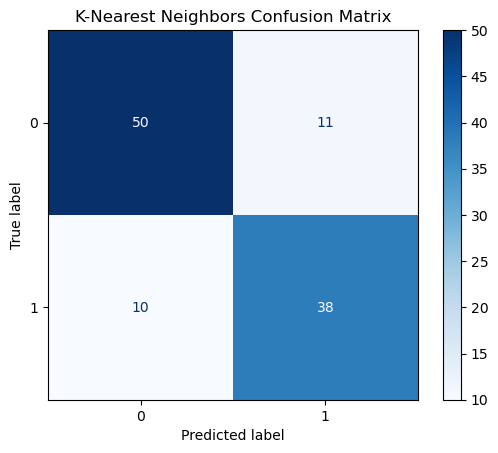

In [53]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot(cmap="Blues")
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.show()

##Decision Tree

In [54]:

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

In [55]:
print("🔹 Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))

🔹 Decision Tree Results:
Accuracy: 0.7248
Precision: 0.6875
Recall: 0.6875
F1-Score: 0.6875

Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        61
           1       0.69      0.69      0.69        48

    accuracy                           0.72       109
   macro avg       0.72      0.72      0.72       109
weighted avg       0.72      0.72      0.72       109



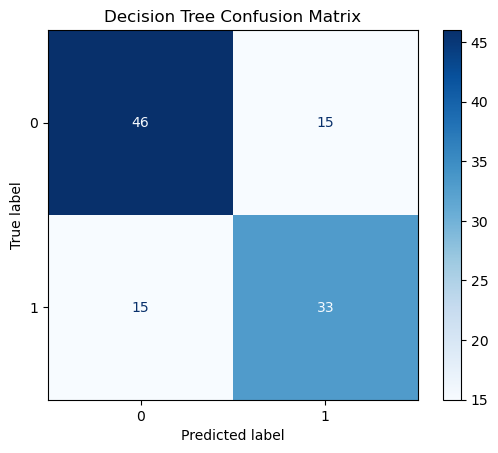

In [56]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot(cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()

##Random Forest

In [57]:


rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [58]:
joblib.dump(rf,"Random_Forest.pkl")

['Random_Forest.pkl']

In [59]:
print("🔹 Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))

🔹 Random Forest Results:
Accuracy: 0.8349
Precision: 0.8261
Recall: 0.7917
F1-Score: 0.8085

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        61
           1       0.83      0.79      0.81        48

    accuracy                           0.83       109
   macro avg       0.83      0.83      0.83       109
weighted avg       0.83      0.83      0.83       109



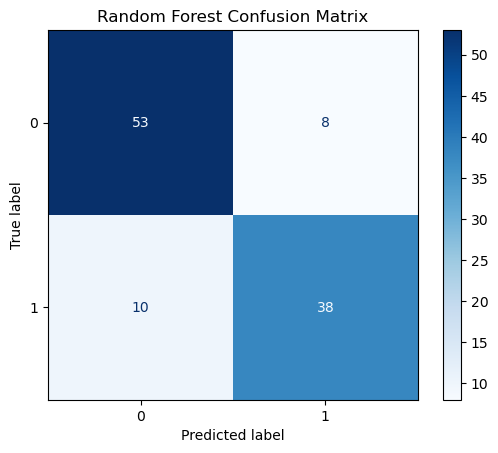

In [60]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

##XG Boost

In [61]:


xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

/home/usmancout/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:45:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [62]:
print("🔹 XGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_xgb):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_xgb))

🔹 XGBoost Results:
Accuracy: 0.8073
Precision: 0.8000
Recall: 0.7500
F1-Score: 0.7742

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        61
           1       0.80      0.75      0.77        48

    accuracy                           0.81       109
   macro avg       0.81      0.80      0.80       109
weighted avg       0.81      0.81      0.81       109



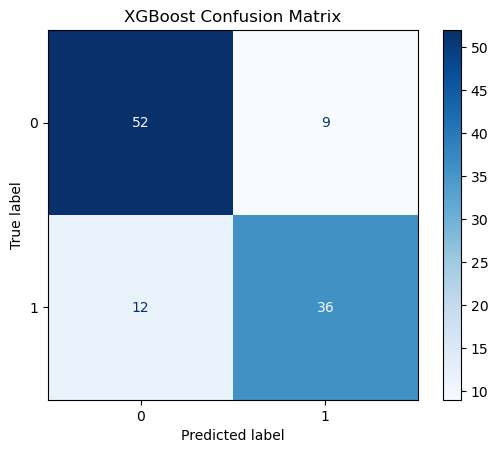

In [63]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot(cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.show()